enter the number of variables: 20
Enter the initial population size: 10
Enter the minimum value of X: -100
Enter the maximum value of X: 100
Enter the max number of iterations: 500
[58968.77440691 58420.20048732 58420.20048732 58361.76903921
 58361.54944258 58309.59804385 58308.12025826 58286.33245696
 58286.33245696 58265.03068746 58265.03068746 58229.85507177
 58204.51728656 58182.22701991 58165.54942082 58162.99918852
 58159.8308895  58092.60775557 58091.88173419 58091.87785856
 58044.879272   58044.879272   58044.879272   58044.61224654
 58043.66208644 57968.54217746 57947.0208756  57901.55563181
 57835.50816857 57835.47669777 57804.10429984 57756.00932168
 57756.00932168 57750.39778193 57703.21398034 57702.07847802
 57666.36448568 57665.74862612 57665.74862612 57663.33485704
 57663.26611486 57635.39901927 57607.82436052 57601.91336184
 57601.73019219 57598.98020331 57558.18878766 57552.74862967
 57525.56434336 57524.14352269 57524.14352269 57494.73000916
 57494.73000916 57402.2778

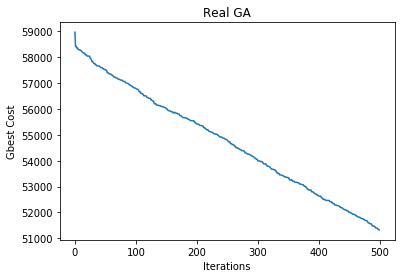

In [9]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
v=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(v,N,xmin,xmax):
    return ((np.random.rand(N,v))*(2*xmax))-xmax
pop=POP(v,N,xmin,xmax)
#fitness
def fitness(a):
    return np.sum(a**2)
def findfitness(pop):
    return np.apply_along_axis(fitness,1,pop)
bests=np.empty((iterations,v))
for iteration in range(0,iterations):
        fit=findfitness(pop)
        #Tournament Selection
        parent=np.empty((N,v))
        for s in range(0,N):
            r1=np.random.randint(0,N)
            r2=r1
            while r2==r1:
                r2=np.random.randint(0,N)
            if fit[r1]<fit[r2]:
                parent[s]=pop[r1]
            else:
                parent[s]=pop[r2]
        #crossover
        Pc=0.8
        Uc=20
        child=np.empty((int((Pc*N)),v))
        for c in range(0,int(Pc*N),2):
            for f in range(0,v):
                r=np.random.rand()
                if r<=0.5:
                    b=(2*r)**(1/(1+Uc))
                else:
                    b=1/((2*(1-r))**(1/(1+Uc)))
                child[c,f]= ((1+b)*parent[c,f]+(1-b)*parent[c+1,f])/2
                child[c+1,f] =((1-b)*parent[c,f]+(1+b)*parent[c+1,f])/2
        #Mutation
        mpop=np.concatenate((pop, child), axis=0)
        Pm=0.2
        Um=20
        for i in range(0,int(Pm*mpop.shape[0])):
            r3=np.random.randint(0,mpop.shape[0])
            for m in range(0,v):
                r4=np.random.rand()
                if r4<=0.5:
                    d=((2*r4)**(1/(1+Um)))-1
                else:
                    d=1-((2*(1-r4))**(1/(1+Um)))
                mpop[r3,m]+=d
        fitness_b=findfitness(mpop)
        sortindex=np.argsort(fitness_b,axis=0)
        mpop=mpop[sortindex,:].reshape(int(N+(Pc*N)),v)
        newgen=mpop[0:N,:]
        fitness_a=findfitness(newgen)
        bests[iteration]=newgen[0]        
        pop=newgen
bestcost=findfitness(bests)
print(bestcost)
plt.plot(bestcost)
plt.xlabel('Iterations')
plt.ylabel('Gbest Cost')
plt.title('Real GA')
plt.show()